1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
x = np.random.randint(0, 37)
if (x == 0):
    print("Zero")
elif (x % 2 == 0):
    print(x, "red")
else:
    print(x, "black")

24 red


2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.

2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9. И постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [25]:
# Теорема о сложении вероятностей.
# Вероятность появления одного из двух несовместных событий равна сумме вероятностей этих событий.
# P(A+B) = P(A) + P(B)
# P(A) = m/n, где m - кол-во выпадений орла (1), n - общее кол-во испытаний
# P(B) = k/n, где k - кол-во выпадений решки (0), n - общее кол-во испытаний
# P(A+B) = P(A) + P(B) = m/n + k/n = (m+k)/n
throws = 1000
eagle, nutlet = 0, 0

for i in range(0, throws):
    x = np.random.uniform(1, 10)
    if x < 6:
        eagle += 1
    else:
        nutlet += 1
print("Орел -", eagle, "Решка -", nutlet)
# если случай падения на ребро не рассматриваем
# то P(A+B) = P(A) + P(B) = 1/2 + 1/2 = 1
# проверим:
eagle/throws + nutlet/throws == 1

Орел - 547 Решка - 453


True

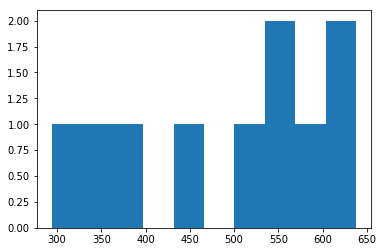

In [30]:
# сгенерируем n выборок m случайных чисел и запишем результат в массив:
n = 10
m = 10
total = np.array([np.random.randint(0, 100, m) for _ in range(n)])
# построим гистограмму распредления суммы случайных величин:
plt.hist(np.array([np.sum(x) for x in total]))
plt.show()   

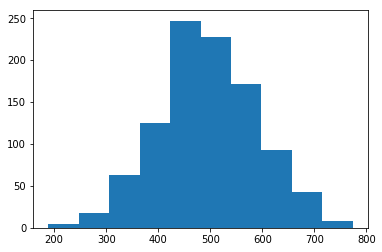

In [31]:
# сгенерируем n выборок m случайных чисел и запишем результат в массив:
n = 1000
m = 10
total = np.array([np.random.randint(0, 100, m) for _ in range(n)])
# построим гистограмму распредления суммы случайных величин:
plt.hist(np.array([np.sum(x) for x in total]))
plt.show()  

In [ ]:
# При увеличении выборок, мы получаем более корректный результат

# Центра́льные преде́льные теоре́мы (Ц. П. Т.) — класс теорем в теории вероятностей, утверждающих, что сумма достаточно большого 
# количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит 
# в сумму определяющего вклада), имеет распределение, близкое к нормальному.
# Так как многие случайные величины в приложениях формируются под влиянием нескольких слабо зависимых случайных факторов, 
# их распределение считают нормальным. При этом должно соблюдаться условие, что ни один из факторов не является доминирующим. 
# Центральные предельные теоремы в этих случаях обосновывают применение нормального распределения.

3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

3.2 Повторите расчеты, взяв другие значения n и k.

In [48]:
# Формула Бернулли — формула в теории вероятностей, позволяющая находить вероятность появления события A определённое количество 
# раз при нескольких независимых испытаниях. Формула Бернулли позволяет избавиться от большого числа вычислений — сложения и умножения 
# вероятностей — при достаточно большом количестве испытаний.
def Bernoulli(n, k):
    C = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
    p = 1 / 2
    q = 1 - p
    return C * np.power(p, k) * np.power(q, n - k)

In [49]:
def Monte_Carlo(k, n):
    a = np.random.randint(0, 2, n)
    b = np.random.randint(0, 2, n)
    c = np.random.randint(0, 2, n)
    d = np.random.randint(0, 2, n)
    x = a + b + c + d
    for i in range(0, n):
        if x[i] == 2:
            k = k + 1
    return k / n        
print(f'Monte Carlo: {np.round(Monte_Carlo(0, 10000), 4)},  Bernoulli: {np.round(Bernoulli(4, 2), 4)}')

Monte Carlo: 0.3776,  Bernoulli: 0.375


In [50]:
# С другими k and n
def Bernoulli(n, k):
    C = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
    p = 1 / 2
    q = 1 - p
    return C * np.power(p, k) * np.power(q, n - k)

In [51]:
def Monte_Carlo(k, n):
    a = np.random.randint(0, 2, n)
    b = np.random.randint(0, 2, n)
    c = np.random.randint(0, 2, n)
    d = np.random.randint(0, 2, n)
    e = np.random.randint(0, 2, n)
    f = np.random.randint(0, 2, n)
    x = a + b + c + d
    for i in range(0, n):
        if x[i] == 2:
            k = k + 1
    return k / n        
print(f'Monte Carlo: {np.round(Monte_Carlo(0, 10000), 4)},  Bernoulli: {np.round(Bernoulli(6, 3), 4)}')

Monte Carlo: 0.3758,  Bernoulli: 0.3125


In [ ]:
5. Дополните код расчетом коэффициента корреляции x и y по формуле

